In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
df=pd.read_csv('sales.csv')

In [56]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [18]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [72]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


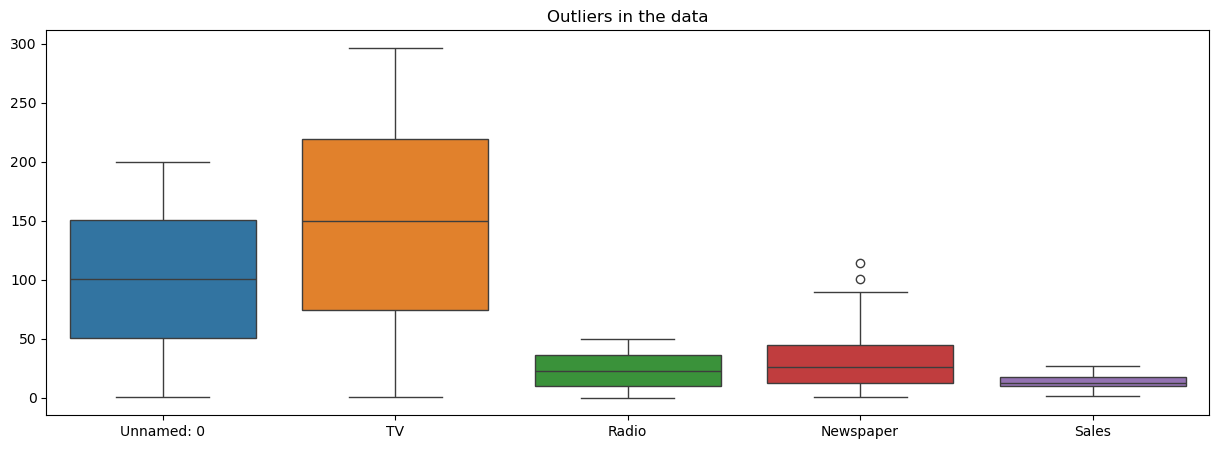

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

In [78]:
Q1= df.quantile(0.25)
Q2 = df.quantile(0.75)
IQR = Q2 - Q1
df[(df["Newspaper"] > (Q2["Newspaper"] + 1.5 * IQR["Newspaper"]))]

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


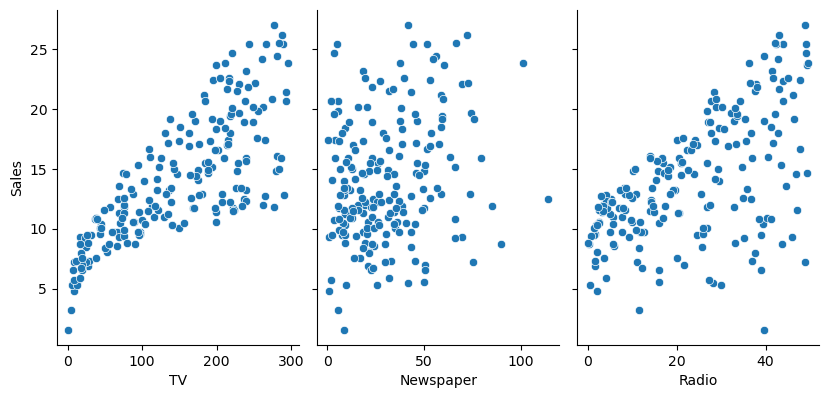

In [32]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

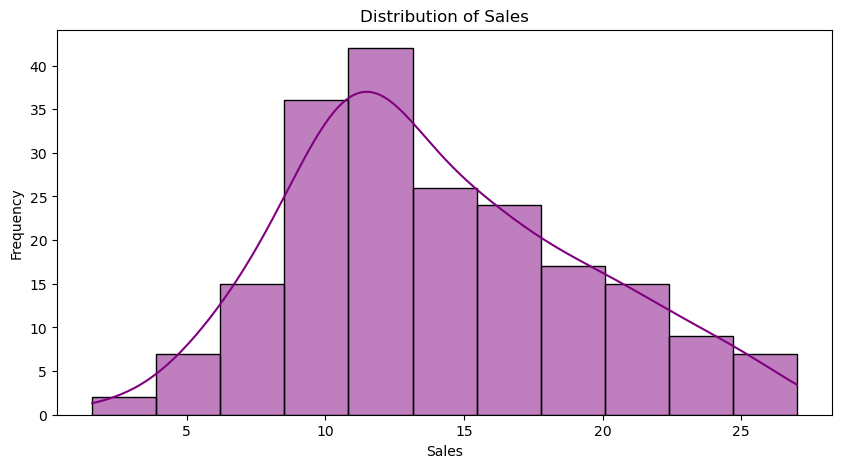

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

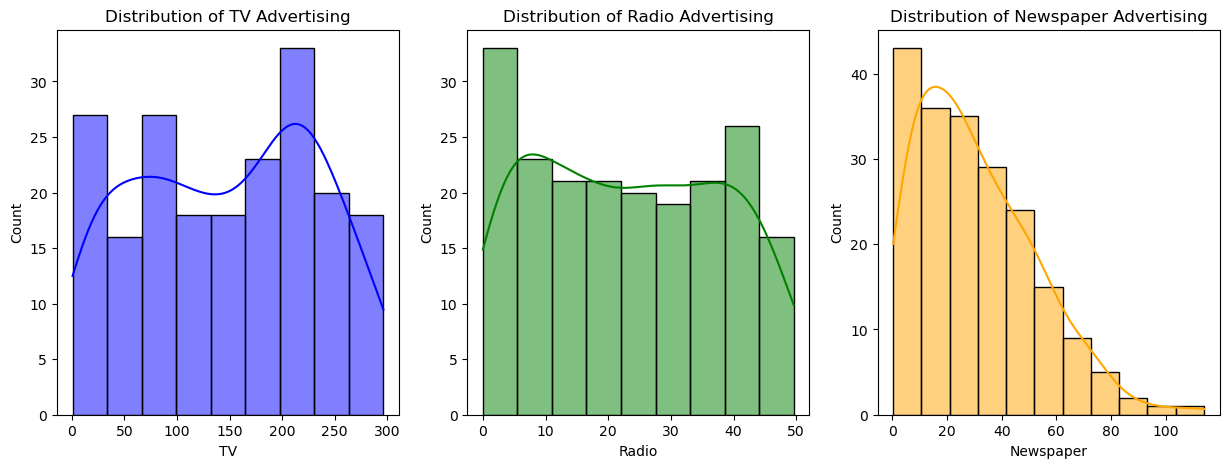

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='orange')
plt.title('Distribution of Newspaper Advertising')
plt.show()

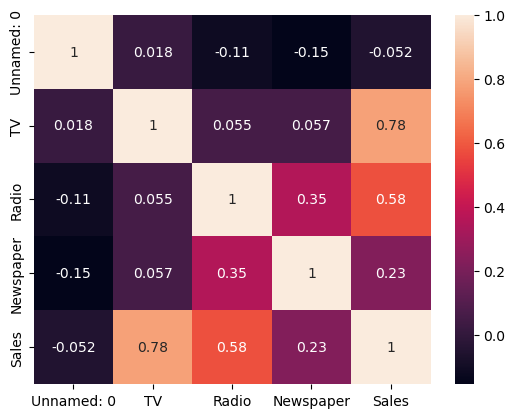

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
correlation_matrix = df.corr()
correlation_matrix

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


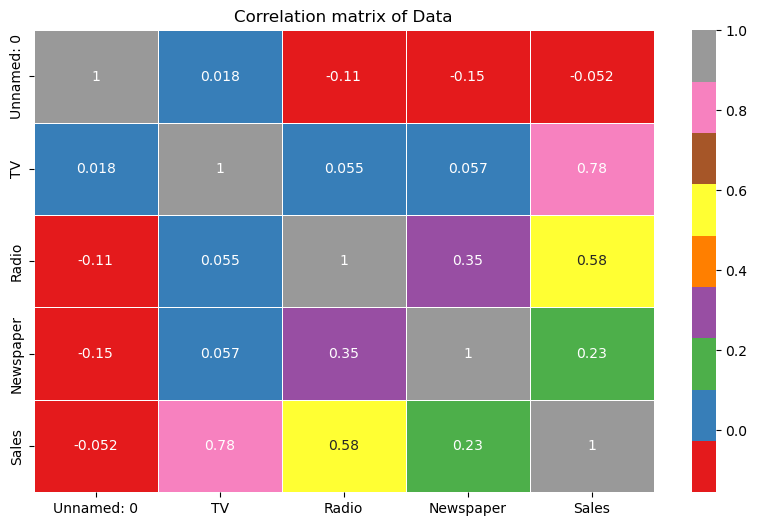

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set1', linewidths=0.5)
plt.title('Correlation matrix of Data')
plt.show()

In [40]:
X= df[['TV', 'Radio', 'Newspaper']]
Y=df['Sales']

In [46]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [48]:
Y_pred = model.predict(X_test)

In [50]:
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('R2 Score:', r2_score( Y_test, Y_pred))

Mean Squared Error: 3.1740973539761046
R2 Score: 0.899438024100912


In [54]:
new_data = pd.DataFrame({'TV':[220], 'Radio': [45], 'Newspaper':[10]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [21.36094977]
